In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
Eoff=2.0
Ts=collect(300.0:50.0:900.0)
xs=collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)
x=1.0
var0=[Ts[1],x]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

bandX3=parBandTx(effMassX3(var0),0.0,EX3(var0),[EX3],[effMassX3],var0)
bandX1=parBandTx(effMassX1(var0),0.0,EX1(var0),[EX1],[effMassX1],var0)
bandHH=parBandTx(effMassHH(var0),0.0,EHH(var0),[EHH],[effMassHH],var0)
bandLH=parBandTx(effMassLH(var0),0.0,ELH(var0),[ELH],[effMassLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX3,bandX3,bandX3],var0)
#bndstTx=BandStrucTx([bandLH,bandX3],var0)

effMassesX1=Array{Float64}(length(xs),length(Ts))
effMassesX3=Array{Float64}(length(xs),length(Ts))

EX1s=Array{Float64}(length(xs),length(Ts))
EX3s=Array{Float64}(length(xs),length(Ts))

NII=1e12*1e6
vartau0=[bandX3.effMass,Ts[1],1.0,x,1.5,bandX3,NII,bndstTx]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, var[6]:band, var[7]:NII var[8]:bndst
tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],var[3]
,tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],var[3]
,opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauII(var)=tauII_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3]
,tauPOPIIint(var[5],var[2],var[4],var[6]))
tauACTx=tau_electron_B([tauAC],vartau0)
tauPOPTx=tau_electron_B([tauPOP],vartau0)
tauPOPTx2=tau_electron_B([tauPOP2],vartau0)
tauIITx=tau_electron_B([tauAC,tauPOP2,tauII],vartau0)
#tauTOTTx=tau_electron_B([tauAC,tauPOP,tauII],vartau0)
#tauTOTTx=tau_electron_B([tauAC,tauPOP],vartau0)
#tauTOTTx=tau_electron_B([tauAC,tauPOP2],vartau0)
tauTOTTx=tau_electron_B([tauAC,tauPOP2,tauII2],vartau0)#tauAC,tauII2,tauPOP2
#tauTOTTx=tau_electron_B([tauAC],vartau0)

#tauACs=Array{Float64}(length(xs),length(Ts),length(Es))
#tauPOPs=Array{Float64}(length(xs),length(Ts),length(Es))
#tauIIs=Array{Float64}(length(xs),length(Ts),length(Es))
#tauTOTs=Array{Float64}(length(xs),length(Ts),length(Es))
#tauplot=Array{Float64}(length(Es))

numofn=[-9.5e19]#,-1.5e19,-2.5e19,-4.5e19][-2.5e19,-8.0e19]#
Efxs=collect(0.0:0.01:3.0)
eqvaluem=Array{Float64}(length(Ts),length(Efxs))
EfcalcM=Array{Float64}(length(Ts))
eqvalue=Array{Float64}(length(Ts))
eqvalue=Array{Float64}(length(Ts))

xmax=3.0
sigmas=Array{Float64}(length(Ts),length(numofn))
seebecks=Array{Float64}(length(Ts),length(numofn))
Efs=Array{Float64}(length(Ts),length(numofn))
numofnsout=Array{Float64}(length(Ts),length(numofn))
numofnsoutn=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutnp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutTOT=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
tauACs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauPOPs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauIIs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))
taugetTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))
bandX3out=Array{Float64}(length(Es),length(Ts),length(numofn))
bandX1out=Array{Float64}(length(Es),length(Ts),length(numofn))
bandLHout=Array{Float64}(length(Es),length(Ts),length(numofn))
bandHHout=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDX1out=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDX3out=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDLHout=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaX3out=Array{Float64}(length(Ts),length(numofn))
sigmaLHout=Array{Float64}(length(Ts),length(numofn))
sigmabandsout=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
seebeckbandsout=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
xSn=x
##Mg2Si Nv=1 tau(AC,POP2,II2) N-=8e19 
#Efinput=[0.1751,0.17395,0.1725,0.1708,0.16885,0.16665,0.1642,0.1615,0.15855,0.15535,0.15185,0.14815,0.1442]
##
##Mg2Si Nv=2 tau(AC,POP2,II2) N-=6e19 
#Efinput=[0.107,0.1048,0.10225,0.0993,0.09595,0.0922,0.0881,0.0836,0.0788,0.0736,0.06815,0.06235,0.05625]
##
##Mg2Si Nv=3 tau(AC,POP2,II2) N-=6e19 
#Efinput=[0.07835,0.07535,0.07185,0.0679,0.06345,0.0585,0.05315,0.0474,0.04125,0.03475,0.0279,0.02065,0.01315]
##

##Mg2Si Nv=1 tau(AC,POP2,II2) N-=6e19 
##Efinput=[0.14335,0.14175,0.1399,0.13775,0.1353,0.13255,0.12945,0.1261,0.12245,0.11845,0.11425,0.1097,0.10495]
##
##Mg2Si Nv=1 tau(AC,POP2,II2) N-=3e19
#Efinput=[0.08605,0.0833,0.0801,0.0764,0.0723,0.06775,0.06275,0.0574,0.05165,0.04555,0.0391,0.0323,0.0252]
##
##Mg2Si Nv=2 tau(AC,POP2,II2) N-=3e19
#Efinput=[0.04685,0.04235,0.0372,0.03145,0.02515,0.0183,0.01095,0.000315,-0.000505,-0.00137,-0.0227,-0.0321,-0.04185]
##
##Mg2Sn Nv 1 N-=3e19
##Efinput=[0.08605,0.0833,0.0801,0.07645,0.0723,0.06775,0.0628, 0.0574,0.05165,0.04555, 0.0391, 0.0323, 0.0252]
##

for (j,Tx) in enumerate(Ts) 
    bndstTx.var[1]=Tx
    #tauACTx.variables[2]=Tx
    tauTOTTx.variables[2]=Tx    
    types.updatebnstTx(bndstTx)
    #equation(x)=(numofn*1e6-NumofnMultiBand(bndstTx,x,T,xmax))^2
    #for (m,Efx) in enumerate(Efxs)
    #   eqvaluem[j,m]=equation(Efx)
    #end
    #EfcalcM[j]=optimize(equation,EX3(var0)-5kBe*T,20.0,method=:golden_section)
    for (k,nx) in enumerate(numofn)
        tauTOTTx.variables[7]=nx*1e6
        Efs[j,k]=Fermilevel_n(nx,bndstTx,Tx,xmax) # Efinput[j]+Eoff#
        numofnsout[j,k]=NumofnMultiBand(bndstTx,Efs[j,k],Tx,xmax)        
        numofnsoutnp[j,k]=numofnsoutn[j,1]+numofnsoutp[j,2]
        #eqvalue[j]=equation(numofnsout[j]/1e6)
        #sigmas[j,k]=sigma_Multiband(tauACTx,bndstTx,Efs[j,k],Tx) 
        #seebecks[j,k]=seebeck_Multiband(tauACTx,bndstTx,Efs[j,k],Tx)
        sigmas[j,k]=sigma_Multiband(tauTOTTx,bndstTx,Efs[j,k],Tx)
        
        for (bs,band) in enumerate(bndstTx.bands)
            numofnsoutTOT[j,k,bs]=Numofn(band,Efs[j,k],Tx,xmax)  
            numofnsoutn[j,k,bs]=Numofn(band,Efs[j,k],Tx,xmax)  
            sigmabandsout[j,k,bs]=sigma(tauTOTTx,band,Efs[j,k],Tx)
            seebeckbandsout[j,k,bs]=seebeck(tauTOTTx,band,bndstTx,Efs[j,k],Tx)
        end
        sigmaX3out[j,k]=sigma(tauTOTTx,bandX3,Efs[j,k],Tx)
        sigmaLHout[j,k]=sigma(tauTOTTx,bandLH,Efs[j,k],Tx)
        seebecks[j,k]=seebeck_Multiband(tauTOTTx,bndstTx,Efs[j,k],Tx)
        #seebecks[j,k]=seebeck_Nominator(tauTOTTx,bandX3,Efs[j,k],Tx)
       for (l,Ex) in enumerate(Es)
            #bandLHout[l,j,k]=getDOS_SingleBand_E(bandLH,Ex)
            #bandHHout[l,j,k]=getDOS_SingleBand_E(bandHH,Ex)
            #bandX1out[l,j,k]=getDOS_SingleBand_E(bandX1,Ex)
            #bandX3out[l,j,k]=getDOS_SingleBand_E(bandX3,Ex)
            #sigmaDX3out[l,j,k]=sigmaD(tauTOTTx,bandX3,Ex,Efs[j,k],Tx)
            #sigmaDLHout[l,j,k]=sigmaD(tauTOTTx,bandLH,Ex,Efs[j,k],Tx)
            #tauPOPs[l,j,k]=tauPOP_func(epsilon0_x(xSn),epsilonhf_x(xSn),bandX3,Efs[j,k],Tx,bandX3.effMass,Ex,
            #tauPOPIIint(Efs[j,k],Tx,xSn,bandX3),nx*1e6,opPhE(0.0),bndstTx)
            #tauIIs[l,j,k]=tauII_func(epsilon0_x(xSn),epsilonhf_x(xSn),bandX3,Efs[j,k],Tx,nx*1e6,bandX3.effMass,Ex,
            #tauPOPIIint(Efs[j,k],Tx,xSn,bandX3))
            #tauACs[l,j,k]=tauAC_func(Cl(xSn),acPhDa(xSn),Tx,bandX3.effMass,Ex,bandX3)
            #tauTOTs[l,j,k]=1/(1/tauPOPs[l,j,k]+1/tauACs[l,j,k]) #1/(1/tauPOPs[l,j,k]+1/tauIIs[l,j,k]+1/tauACs[l,j,k]) 
            ##var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, var[6]:band, var[7]:NII
            #tauTOTTx.variables[1]=bandX3.effMass
            #tauTOTTx.variables[6]=bandX3
            #taugetTOTs[l,j,k]=get_tau(tauTOTTx,Ex)
        end 
    end
end

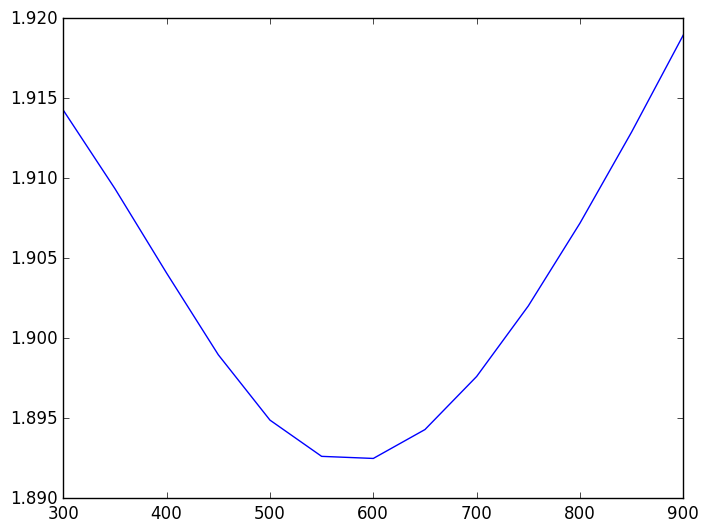

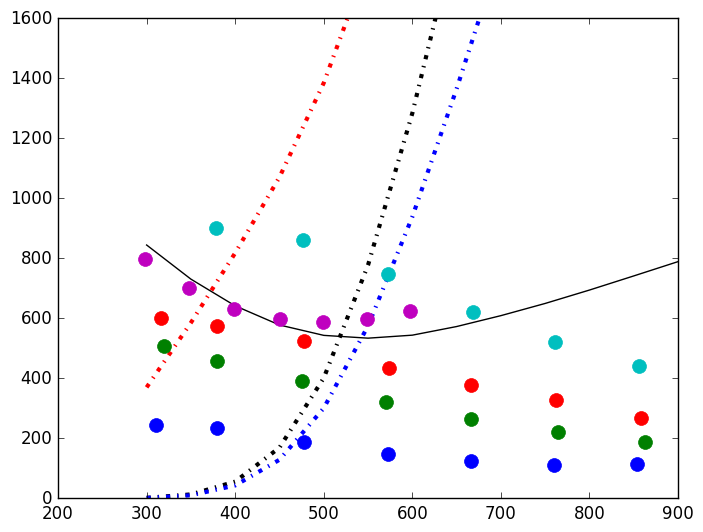

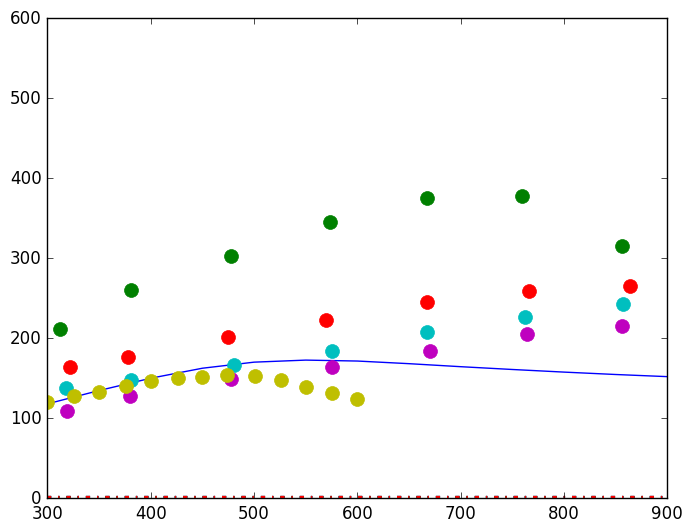

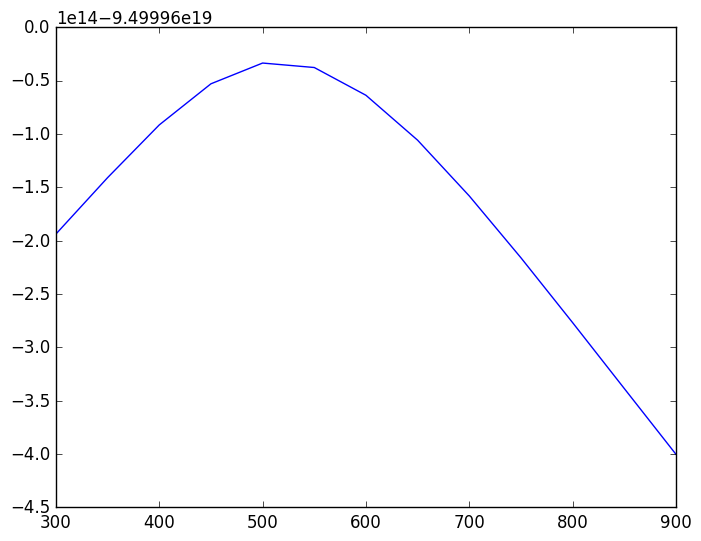

In [2]:
#=figure()
title("Num of carriers at LH")
semilogy(Ts,numofnsoutTOT[:,1,1]/1e6,color="k")
figure()
title("Num of carriers at X3")
plot(Ts,numofnsoutTOT[:,1,2]/-1e6,color="g")

figure()
plot(Es,tauPOPs[:,1,1])
plot(Es,tauPOPs[:,6,1])
plot(Es,tauPOPs[:,12,1])
title("POP tau")
figure()
plot(Es,taugetTOTs[:,1,1])
plot(Es,taugetTOTs[:,6,1])
plot(Es,taugetTOTs[:,12,1])
title("getTOTTx")
figure()
plot(Es,tauACs[:,1,1])
plot(Es,tauACs[:,6,1])
plot(Es,tauACs[:,12,1])
title("AC tau")
figure()
plot(Es,tauIIs[:,1,1])
plot(Es,tauIIs[:,6,1])
plot(Es,tauIIs[:,12,1])
#ylim(0.021,0.0225)
title("II tau")
figure()
plot(Es,tauTOTs[:,1,1])
plot(Es,tauTOTs[:,6,1])
plot(Es,tauTOTs[:,12,1])
title("TOT tau")

figure()
title("Band Structure")
plot(Es,bandX3out[:,1,1],color="b")
plot(Es,bandX3out[:,6,1],color="g")
plot(Es,bandX3out[:,12,1],color="r")
#plot(Es,bandX1out[:,1,1])
#plot(Es,bandX1out[:,6,1])
#plot(Es,bandX1out[:,12,1])
PyPlot.axvline(x=Efs[1,1], ymin=0.0, ymax =1.0 ,  color="b")
PyPlot.axvline(x=Efs[6,1], ymin=0.0, ymax =1.0 ,  color="g")
PyPlot.axvline(x=Efs[12,1], ymin=0.0, ymax =1.0 , color="r")
#plot(Es,bandHHout[:,1,1])
#plot(Es,bandHHout[:,6,1])
#plot(Es,bandHHout[:,12,1])
plot(Es,bandLHout[:,1,1],color="b")
plot(Es,bandLHout[:,6,1],color="g")
plot(Es,bandLHout[:,12,1],color="r")

figure()
plot(Es,sigmaDX3out[:,13,1],linestyle="-",linewidth="3",color="g")
plot(Es,sigmaDLHout[:,13,1],linestyle="-.",linewidth="3",color="c")
grid("on")
title("Differential Cond.")=#
figure()
for p in 1:1:length(numofn)
    plot(Ts,Efs[:,p])
end
figure()
for p in 1:1:length(numofn)
    plot(Ts,sigmas[:,p]/100,linestyle="-",color="k")   
    plot(Ts,sigmabandsout[:,p,1],linestyle="-.",linewidth="3",color="k")
    plot(Ts,sigmabandsout[:,p,2],linestyle="-.",linewidth="3",color="b")
    plot(Ts,sigmabandsout[:,p,3],linestyle="-.",linewidth="3",color="g")
    plot(Ts,sigmabandsout[:,p,5],linestyle="-.",linewidth="3",color="r")
   # end
end
plot(TKMg2Si01T,TKMg2Si01S, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si03T,TKMg2Si03S, linestyle="None",marker=".",markersize=20)
#plot(ASSimMg2SiT,ASSimMg2SiTE, linestyle="--",marker="None")
plot(TKMg2Si05T,TKMg2Si05S, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si1T,TKMg2Si1S, linestyle="None",marker=".",markersize=20)
plot(TKMg2Sn1T,TKMg2Sn1S, linestyle="None",marker=".",markersize=20)
ylim(0,1600)
figure()
for p in 1:1:length(numofn)
    plot(Ts,-1e6*seebecks[:,p]) 
    plot(Ts,seebeckbandsout[:,p,1],linestyle="-.",linewidth="3",color="k")
    plot(Ts,seebeckbandsout[:,p,2],linestyle="-.",linewidth="3",color="b")
    plot(Ts,seebeckbandsout[:,p,3],linestyle="-.",linewidth="3",color="g")
    plot(Ts,seebeckbandsout[:,p,5],linestyle="-.",linewidth="3",color="r")
end
plot(TKMg2Si01TS,TKMg2Si01Se, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si03TS,TKMg2Si03Se, linestyle="None",marker=".",markersize=20)
#plot(ASSimMg2SiT,ASSimMg2SiTS*-1, linestyle="--",marker="None")
plot(TKMg2Si05TS,TKMg2Si05Se, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si1TS,TKMg2Si1Se, linestyle="None",marker=".",markersize=20)
plot(TKMg2Sn1TS,TKMg2Sn1Se, linestyle="None",marker=".",markersize=20)
ylim(0,600)
figure()
for p in 1:1:length(numofn)
    plot(Ts,numofnsout[:,p]/1e6)
end

In [3]:
numofnsoutTOT[:,1,1]/1e6

13-element Array{Float64,1}:
 7.36624e15
 5.54996e16
 2.61699e17
 8.86073e17
 2.32304e18
 4.95668e18
 8.99359e18
 1.44514e19
 2.12573e19
 2.9325e19 
 3.85829e19
 4.89771e19
 6.04669e19

In [4]:
numofnsoutTOT[:,1,2]/1e6

13-element Array{Float64,1}:
 1.35326e16
 1.01959e17
 4.80772e17
 1.62782e18
 4.2677e18 
 9.106e18  
 1.65223e19
 2.6549e19 
 3.90522e19
 5.38735e19
 7.08814e19
 8.99766e19
 1.11085e20

In [5]:
(numofnsoutTOT[:,1,1]+numofnsoutTOT[:,1,2])/1e6

13-element Array{Float64,1}:
 2.08989e16
 1.57459e17
 7.42471e17
 2.51389e18
 6.59075e18
 1.40627e19
 2.55159e19
 4.10004e19
 6.03095e19
 8.31985e19
 1.09464e20
 1.38954e20
 1.71552e20

In [6]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
Eoff=2.0
Ts=collect(300.0:50.0:900.0) 
x=1.0
var0=[Ts[1],x]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

bandX3=parBandTx(effMassX3(var0),0.0,EX3(var0),[EX3],[effMassX3],var0)
bandX1=parBandTx(effMassX1(var0),0.0,EX1(var0),[EX1],[effMassX1],var0)
bandHH=parBandTx(effMassHH(var0),0.0,EHH(var0),[EHH],[effMassHH],var0)
bandLH=parBandTx(effMassLH(var0),0.0,ELH(var0),[ELH],[effMassLH],var0)
#bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX3,bandX3],var0)
bndstTx=BandStrucTx([bandLH,bandX3],var0)
Efin=[0.08605,0.0833,0.0801,0.07645,0.0723,0.06775,
    0.0628, 0.0574,0.05165,0.04555, 0.0391, 0.0323, 0.0252]
numn=Array{Float64}(length(Ts))
nump=Array{Float64}(length(Ts))
numnp=Array{Float64}(length(Ts))
for (s,Tsx) in enumerate(Ts)
    numn[s]=Numofn(bandX3,Efin[s]+Eoff,Tsx,3.0)
    nump[s]=Numofn(bandLH,Efin[s]+Eoff,Tsx,3.0)
    numnp[s]=numn[s]+nump[s]
end

In [7]:
numn/1e6

13-element Array{Float64,1}:
 -3.00707e19
 -3.00483e19
 -3.00417e19
 -3.00442e19
 -3.00287e19
 -3.00276e19
 -3.00323e19
 -3.00182e19
 -3.00149e19
 -3.00155e19
 -3.00147e19
 -3.0008e19 
 -3.00065e19

In [8]:
nump/1e6

13-element Array{Float64,1}:
 9.58103e12
 1.09222e14
 7.05219e14
 3.10771e15
 1.04716e16
 2.89225e16
 6.87353e16
 1.45509e17
 2.80598e17
 5.01868e17
 8.4392e17 
 1.34818e18
 2.06151e18

In [9]:
numnp/1e6

13-element Array{Float64,1}:
 -3.00707e19
 -3.00482e19
 -3.0041e19 
 -3.00411e19
 -3.00183e19
 -2.99987e19
 -2.99636e19
 -2.98727e19
 -2.97343e19
 -2.95136e19
 -2.91707e19
 -2.86598e19
 -2.7945e19 

In [10]:
numofnsoutTOT[:,1,1]/1e6

13-element Array{Float64,1}:
 7.36624e15
 5.54996e16
 2.61699e17
 8.86073e17
 2.32304e18
 4.95668e18
 8.99359e18
 1.44514e19
 2.12573e19
 2.9325e19 
 3.85829e19
 4.89771e19
 6.04669e19

In [11]:
(numofnsoutTOT[:,1,2]+numofnsoutTOT[:,1,1])/1e6

13-element Array{Float64,1}:
 2.08989e16
 1.57459e17
 7.42471e17
 2.51389e18
 6.59075e18
 1.40627e19
 2.55159e19
 4.10004e19
 6.03095e19
 8.31985e19
 1.09464e20
 1.38954e20
 1.71552e20

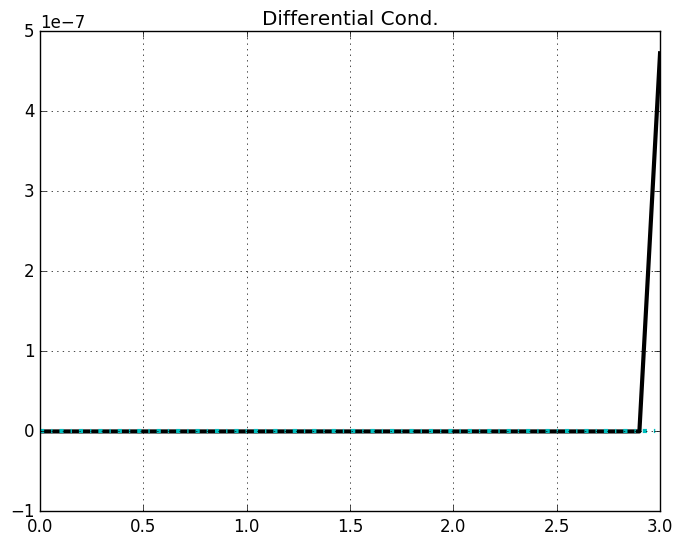

PyObject <matplotlib.text.Text object at 0x000000001ECEF550>

In [12]:
figure()
plot(Es,sigmaDX3out[:,13,1],linestyle="-",linewidth="3",color="k")
plot(Es,sigmaDLHout[:,13,1],linestyle="-.",linewidth="3",color="c")
grid("on")
title("Differential Cond.")

In [13]:
length(sigmaDLHout[:,13,1])

31

In [14]:
Efs-Eoff

13x1 Array{Float64,2}:
 -0.085736 
 -0.0906422
 -0.095918 
 -0.101021 
 -0.105105 
 -0.10737  
 -0.1075   
 -0.105694 
 -0.102378 
 -0.0979677
 -0.0927939
 -0.0870943
 -0.0810359

In [15]:
seebecks*1e6

13x1 Array{Float64,2}:
 -118.256
 -134.895
 -150.277
 -162.779
 -170.361
 -172.927
 -171.754
 -168.453
 -164.688
 -161.195
 -157.924
 -154.925
 -152.255

In [16]:
sigmas/100

13x1 Array{Float64,2}:
 844.803
 731.019
 641.981
 578.178
 543.589
 534.272
 544.268
 573.03 
 609.362
 650.026
 694.668
 741.728
 789.413

In [17]:
TKMg2Si05Se

7-element Array{Float64,1}:
 137.8
 147.6
 166.2
 184.7
 208.2
 226.7
 242.8

In [18]:
TKMg2Si03Se

7-element Array{Float64,1}:
 164.9
 177.3
 202.0
 223.0
 245.3
 258.9
 265.1

In [19]:
kBe*900

0.0775559916

In [20]:
1.17937/0.472979

2.49349336862736

In [21]:
sigmas/100

13x1 Array{Float64,2}:
 844.803
 731.019
 641.981
 578.178
 543.589
 534.272
 544.268
 573.03 
 609.362
 650.026
 694.668
 741.728
 789.413

In [22]:
seebecks*1e6

13x1 Array{Float64,2}:
 -118.256
 -134.895
 -150.277
 -162.779
 -170.361
 -172.927
 -171.754
 -168.453
 -164.688
 -161.195
 -157.924
 -154.925
 -152.255

In [23]:
numofnsout

13x1 Array{Float64,2}:
 -9.49998e25
 -9.49997e25
 -9.49997e25
 -9.49997e25
 -9.49996e25
 -9.49996e25
 -9.49997e25
 -9.49997e25
 -9.49998e25
 -9.49998e25
 -9.49999e25
 -9.49999e25
 -9.5e25    

In [24]:
4384.84/2910.06

1.5067868016467014

In [25]:
6188.18/4633.85

1.3354295024655523

In [26]:
1995.93/1657.69

1.204042975465859

In [27]:
5820.11/47

123.83212765957447

In [28]:
Es

31-element Array{Float64,1}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
 1.1
 1.2
 ⋮  
 1.9
 2.0
 2.1
 2.2
 2.3
 2.4
 2.5
 2.6
 2.7
 2.8
 2.9
 3.0

In [29]:
Ts

13-element Array{Float64,1}:
 300.0
 350.0
 400.0
 450.0
 500.0
 550.0
 600.0
 650.0
 700.0
 750.0
 800.0
 850.0
 900.0

In [30]:
Efs-2.0

13x1 Array{Float64,2}:
 -0.085736 
 -0.0906422
 -0.095918 
 -0.101021 
 -0.105105 
 -0.10737  
 -0.1075   
 -0.105694 
 -0.102378 
 -0.0979677
 -0.0927939
 -0.0870943
 -0.0810359

In [31]:
sigmas

13x1 Array{Float64,2}:
 84480.3
 73101.9
 64198.1
 57817.8
 54358.9
 53427.2
 54426.8
 57303.0
 60936.2
 65002.6
 69466.8
 74172.8
 78941.3

In [32]:
(Tj,sj)    

LoadError: LoadError: UndefVarError: Tj not defined
while loading In[32], in expression starting on line 1

In [33]:
numofnsout/1e12

13x1 Array{Float64,2}:
 -9.49998e13
 -9.49997e13
 -9.49997e13
 -9.49997e13
 -9.49996e13
 -9.49996e13
 -9.49997e13
 -9.49997e13
 -9.49998e13
 -9.49998e13
 -9.49999e13
 -9.49999e13
 -9.5e13    

In [34]:
2241/1456

1.5391483516483517

In [35]:
663.59/487

1.3626078028747435

In [36]:
1172.8/750.204

1.5633081135264542

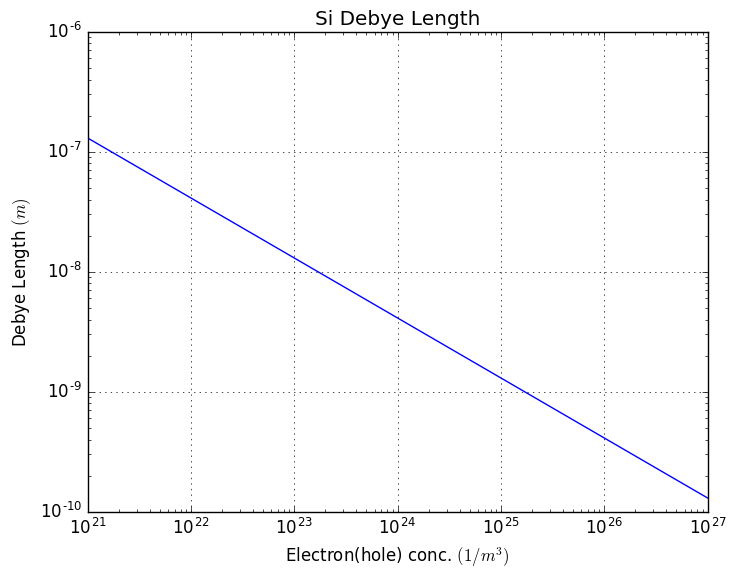

PyObject <matplotlib.text.Text object at 0x000000001EDC9320>

In [37]:
eSi=11.9*8.85e-12
T=300.0
ni=[1e15,1e16,1e17,1e18,1e19,1e20,1e21]*1e6
Ld=[sqrt(eSi*kB*T/q/q/(nl)) for nl in ni]
loglog(ni,Ld)
grid("on")
title("Si Debye Length")
xlabel(L"Electron(hole) conc. $(1/m^3)$")
ylabel(L"Debye Length $(m)$")

In [38]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
Eoff=0.0
Ef=0.1752
Ts=collect(300.0:50.0:900.0)
xs=collect(0.0:0.1:1.0)
Es=collect(Eoff-1.0:0.02:Eoff+1.0)
var0=[Ts[1],xs[1]]
x=0.0


EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

bandX3=parBandTx(effMassX3(var0),0.0,EX3(var0),[EX3],[effMassX3],var0)
bandX1=parBandTx(effMassX1(var0),0.0,EX1(var0),[EX1],[effMassX1],var0)
bandHH=parBandTx(effMassHH(var0),0.0,EHH(var0),[EHH],[effMassHH],var0)
bandLH=parBandTx(effMassLH(var0),0.0,ELH(var0),[ELH],[effMassLH],var0)
#bndstTx=BandStrucTx([bandX1,bandX3,bandLH,bandHH],var0)
bndstTx=BandStrucTx([bandX3,bandLH],var0)

effMassesX1=Array{Float64}(length(xs),length(Ts))
effMassesX3=Array{Float64}(length(xs),length(Ts))

EX1s=Array{Float64}(length(xs),length(Ts))
EX3s=Array{Float64}(length(xs),length(Ts))

NII=-8e19*1e6
vartau0=[bandX3.effMass,Ts[1],1.0,xs[1],1.5,bandX3,NII]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, var[6]:band, var[7]:NII
tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],var[3]
,tauPOPIIint(var[5],var[2],var[4],var[6]),var[7])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],var[3]
,opPhE(var[4]))
tauII(var)=tauII_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3]
,tauPOPIIint(var[5],var[2],var[4],var[6]))
tauACTx=tau_electron_B([tauAC],vartau0)
tauPOPTx=tau_electron_B([tauPOP],vartau0)
tauIITx=tau_electron_B([tauII],vartau0)
#tauTOTTx=tau_electron_B([tauAC,tauPOP,tauII],vartau0)
#tauTOTTx=tau_electron_B([tauAC,tauPOP],vartau0)
tauTOTTx=tau_electron_B([tauAC,tauPOP2],vartau0)
#tauTOTTx=tau_electron_B([tauAC,tauII],vartau0)
#tauTOTTx=tau_electron_B([tauAC],vartau0)

xmax=3.0
sigmas=Array{Float64}(length(Ts))
seebecks=Array{Float64}(length(Ts))
numofnsout=Array{Float64}(length(Ts))
tauACs=Array{Float64}(length(Es),length(Ts))
tauPOPs=Array{Float64}(length(Es),length(Ts))
tauIIs=Array{Float64}(length(Es),length(Ts))
tauTOTs=Array{Float64}(length(Es),length(Ts))
taugetTOTs=Array{Float64}(length(Es),length(Ts))
bandX3out=Array{Float64}(length(Es),length(Ts))
bandX1out=Array{Float64}(length(Es),length(Ts))
bandLHout=Array{Float64}(length(Es),length(Ts))
bandHHout=Array{Float64}(length(Es),length(Ts))
sigmaDX1out=Array{Float64}(length(Es),length(Ts))
sigmaDX3out=Array{Float64}(length(Es),length(Ts))
xSn=x

Efout=Fermilevel_n(NII/1e6,bndstTx,Ts[1],3.0)

for (j,Tx) in enumerate(Ts) 
    bndstTx.var[1]=Tx    
    tauTOTTx.variables[2]=Tx    
    types.updatebnstTx(bndstTx)   
    sigmas[j]=sigma_Multiband(tauTOTTx,bndstTx,Ef,Tx)     
    seebecks[j]=seebeck_Multiband(tauTOTTx,bndstTx,Ef,Tx)        
    for (l,Ex) in enumerate(Es)
        bandLHout[l,j]=getDOS_SingleBand_E(bandLH,Ex)
        bandHHout[l,j]=getDOS_SingleBand_E(bandHH,Ex)
        bandX1out[l,j]=getDOS_SingleBand_E(bandX1,Ex)
        bandX3out[l,j]=getDOS_SingleBand_E(bandX3,Ex)
        sigmaDX3out[l,j]=sigmaD(tauTOTTx,bandX3,Ex,Ef,Tx)
        sigmaDX1out[l,j]=sigmaD(tauTOTTx,bandX3,Ex,Ef,Tx)
        tauPOPs[l,j]=tauPOP_func(epsilon0_x(xSn),epsilonhf_x(xSn),bandX3,Ef,Tx,bandX3.effMass,Ex,
        tauPOPIIint(Ef,Tx,xSn,bandX3),NII)
        tauIIs[l,j]=tauII_func(epsilon0_x(xSn),epsilonhf_x(xSn),bandX3,Ef,Tx,NII,bandX3.effMass,Ex,
        tauPOPIIint(Ef,Tx,xSn,bandX3))
        tauACs[l,j]=tauAC_func(Cl(xSn),acPhDa(xSn),Tx,bandX3.effMass,Ex,bandX3)
        tauTOTs[l,j]=1/(1/tauPOPs[l,j]+1/tauIIs[l,j]+1/tauACs[l,j]) 
            #var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, var[6]:band, var[7]:NII
        tauTOTTx.variables[1]=bandX3.effMass
        tauTOTTx.variables[6]=bandX3
        taugetTOTs[l,j]=get_tau(tauTOTTx,Ex)
        
    end
end
println("Ef found: ",Efout)
#=figure()
plot(Es,tauACs[:,1])
plot(Es,tauACs[:,6])
plot(Es,tauACs[:,12])
title("AC tau")
figure()
plot(Es,tauPOPs[:,1])
plot(Es,tauPOPs[:,6])
plot(Es,tauPOPs[:,12])
title("POP tau")
figure()
plot(Es,tauIIs[:,1])
plot(Es,tauIIs[:,6])
plot(Es,tauIIs[:,12])
#ylim(0.021,0.0225)
title("II tau")
figure()
plot(Es,tauTOTs[:,1])
plot(Es,tauTOTs[:,6])
plot(Es,tauTOTs[:,12])
title("TOT tau")
figure()
plot(Es,taugetTOTs[:,1])
plot(Es,taugetTOTs[:,6])
plot(Es,taugetTOTs[:,12])
figure()
plot(Es,bandX3out[:,1])
plot(Es,bandX3out[:,6])
plot(Es,bandX3out[:,12])
plot(Es,bandX1out[:,1])
plot(Es,bandX1out[:,6])
plot(Es,bandX1out[:,12])
#plot(Es,bandHHout[:,1,1])
#plot(Es,bandHHout[:,6,1])
#plot(Es,bandHHout[:,12,1])
#plot(Es,bandLHout[:,1,1])
#plot(Es,bandLHout[:,6,1])
#plot(Es,bandLHout[:,12,1])
title("Band Structure")
figure()
plot(Es,sigmaDX3out[:,1])
title("Differential Cond.")=#
figure()
plot(Ts,sigmas/100)
plot(TKMg2Si01T,TKMg2Si01S, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si03T,TKMg2Si03S, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si05T,TKMg2Si05S, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si1T,TKMg2Si1S, linestyle="None",marker=".",markersize=20)
#plot(TKMg2Sn1T,TKMg2Sn1S, linestyle="None",marker=".",markersize=20)
#ylim(0,1600)
figure()
plot(Ts,-1e6*seebecks) 
plot(TKMg2Si01TS,TKMg2Si01Se, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si03TS,TKMg2Si03Se, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si05TS,TKMg2Si05Se, linestyle="None",marker=".",markersize=20)
plot(TKMg2Si1TS,TKMg2Si1Se, linestyle="None",marker=".",markersize=20)
#plot(TKMg2Sn1TS,TKMg2Sn1Se, linestyle="None",marker=".",markersize=20)
ylim(0,600)

LoadError: LoadError: MethodError: `tauPOP_func` has no method matching tauPOP_func(::Float64, ::Float64, ::types.parBandTx{Float64}, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64)
Closest candidates are:
  tauPOP_func(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, !Matched::Any, !Matched::Any)
while loading In[38], in expression starting on line 78

In [39]:
sigmas


13-element Array{Float64,1}:
 1.45832e5   
 1.06218e-314
 1.06218e-314
 1.06218e-314
 1.06098e-314
 1.06098e-314
 1.06098e-314
 1.06098e-314
 1.06098e-314
 1.06097e-314
 1.06098e-314
 1.06097e-314
 1.06098e-314

In [40]:
1479/1379

1.0725163161711384

In [41]:
845.59/776.34

1.0892006079810392

In [42]:
seebecks

13-element Array{Float64,1}:
 -5.46871e-5  
  1.09734e-314
  1.09736e-314
  1.09736e-314
  1.09734e-314
  1.09734e-314
  1.09734e-314
  1.09734e-314
  1.09734e-314
  1.09734e-314
  1.09734e-314
  0.0         
  0.0         

In [43]:
Ts

13-element Array{Float64,1}:
 300.0
 350.0
 400.0
 450.0
 500.0
 550.0
 600.0
 650.0
 700.0
 750.0
 800.0
 850.0
 900.0